# Diabetes Prediction using Decision tree 


In [1]:
from sklearn.datasets import load_diabetes

In [2]:
dataset = load_diabetes()

In [3]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
print(dataset['DESCR'])


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [9]:
import pandas as pd
df_diabetes= pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

In [10]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [17]:
##  dependent and independent features
x = df_diabetes
y= dataset['target']


In [18]:
from  sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [19]:
x_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


In [20]:
## corelation 
x_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

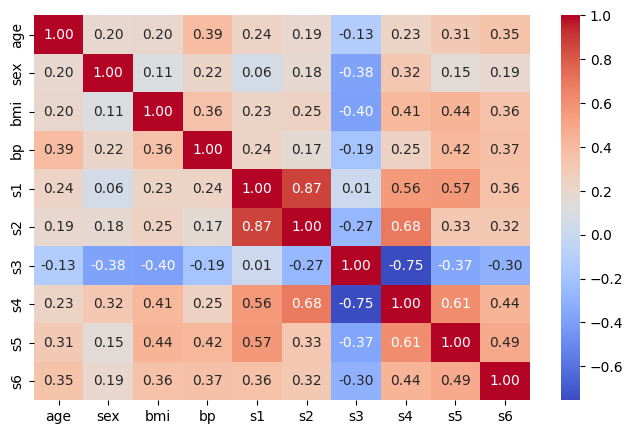

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(x_train.corr(), annot=True, cmap='coolwarm')

In [24]:
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

# Hyperparameter tuning

In [28]:
params={
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_features': [ 'auto', 'sqrt', 'log2'],
    'max_depth': [1,2, 3, 4, 5, 10, 15, 20, 25,30],
   
}

In [29]:
params

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
 'splitter': ['best', 'random'],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]}

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
regressor=DecisionTreeRegressor()
Grid=GridSearchCV(regressor, param_grid=params, scoring='neg_mean_squared_error', cv=5,)

In [36]:
import warnings
warnings.filterwarnings("ignore")   
Grid.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [42]:
Grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'random'}

In [46]:
## Prediction
y_pred= Grid.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 5079.005540783255
R-squared: 0.19733414324081178
Mean Absolute Error: 59.60121178157138


In [48]:
selectmodel = DecisionTreeRegressor(
	criterion='squared_error',
	max_depth=4,
	max_features='log2',
	splitter='random'
)

In [49]:
selectmodel.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, max_features='log2', splitter='random')

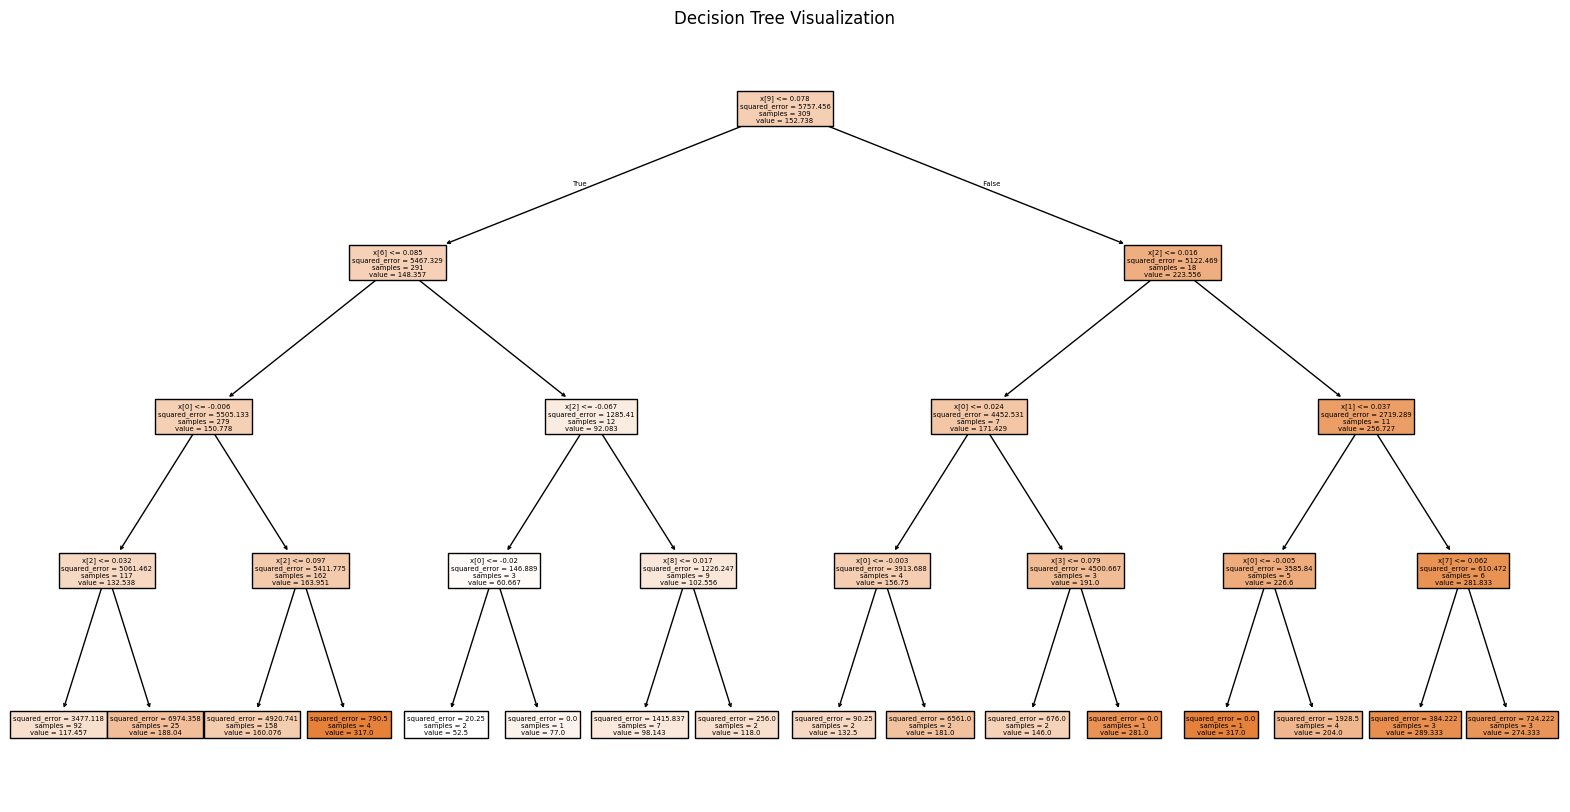

In [51]:
## Visalization of the Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(selectmodel, filled=True)
plt.title("Decision Tree Visualization")
plt.show()
